# Classification with K nearest neighbors (kNN)

### 1. kNN Background

#### 1.1 Type of algorithm

Today, we learned that kNN is a supervised machine learning methods. It can be used for both classification and regression problems. This means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between the features $x$ and the outcomes $y$. Here, we will use kNN for classification. This means that $y$ takes categorical values, and the task then is to predict the category $y$ for new observations of $x$. 

#### 1.2 Distance measure

In the classification setting, the k-nearest neighbor algorithm essentially boils down to forming a majority vote between the k most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let $x^{(i)}$ be data point with $p$ features $(x^{(i)}_{1}, x^{(i)}_{2},..., x^{(i)}_{p})$, $N$ be the total number of data points $(i=1,2,...,N)$.  The Euclidean distance between $x^{(i)}$ and $x^{(j)}$ is defined as: 


$$d(x^{(i)}, x^{(j)}) = \sqrt{(x^{(i)}_{1} - x^{(j)}_{1})^2 + (x^{(i)}_{2} - x^{(j)}_{2})^2 + ... + (x^{(i)}_{p} - x^{(j)}_{p})^2}$$

Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

#### 1.3 Algorithm steps

The kNN algorithm consists of four simple steps:

    (1) Choose the number k of neighbors.

    (2) Take the k nearest neighbors of the new data point, according to your distance metric.

    (3) Among these k neighbors, count the number of data points to each category.

    (4) Assign the new data point to the category with the highest count among neighbours of the new data point.
    
Throughout the notebook we will use a number of libraries and functions. Check out their manuals to familiarize yourselves with the methods.

### 2. Importing and preperation of data

#### 2.1 Import libraries

Let's load some libraries we will use throughout the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

#### 2.2 Load dataset

We will analyse the Iris data set you have already familiarised yourself with earlier during the course. It includes 3 iris species with 50 samples each. For each sample, we have 4 features: sepal length and width as well as petal length and width, all in cm. Here, species is a categorical outcome that we aim to predict from the numeric features using KNN.

In [2]:
# Importing the dataset
dataset = pd.read_csv('./Iris.csv')

#### 2.3 Summarize the Dataset

At the start, it is always best to get a quick glimpse of the data and its format. We can get a quick idea of how many samples (rows) and how many attributes (columns) the data contains using ```shape()```.

In [3]:
dataset.shape

(150, 6)

Using ```head(n)``` we can see the first $n$ lines of the data table.

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Using describe(), we can get some summary statistics of the data. 

In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [6]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 2.4 Dividing data into features and labels

As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. The last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [7]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### 2.5 Label encoding

Our species labels are categorical, encoded in character strings. The KNN function, KNeighborsClassifier, which we will use, does not accept string labels. We therefore use LabelEncoder to transform them into numbers: Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#### 2.6 Spliting dataset into training set and test set

In machine learning, it is common to split datasets into training and test data sets. We will learn more about this during the next lecture. 

Essentially, splitting the data we can test the model performance on data that is independent from the training data. The training data is used to 'train' our machine learning model, i.e. to adjust the method's parameters, and the test dataset is then used to assess the performance of the model on previously unseen data using an appropriate metric of performance. 

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Note: Often, different features can take values on very different scales, in which case it would make sense to scale or 'normalise' data before further analysis. In our case, the different features, sepal and petal lengths and widths, take similar values, and we therefore don't have to worry about normalisation. Just keep in mind that in other data scenarios it can be extremly important to apply feature scaling before running classification algorithms.

### 3. Visual data exploration

In __§2.3__, we took an initial look at the data format. Equally important is looking at our data by means of different visualisations to get a feel of the data before starting any further model analysis via machine learning. In the following, we will plot the data in different ways. 

__TASK__: Think about which plots you find most helpful and why!

#### 3.1. Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates, single data points are represented as connected line segments with features along the x-axis and their values on the y-axis. Each connected line segment represents one data point, and we can colour the lines by the outcome label (species). Points that tend to cluster will appear closer together.

__TASK__: Using the ```parallel_coordinates()``` function from the ```pandas.plotting``` library, make a parallel coordinates plot with lines coloured by 'Species'. Tip: Make sure to remove the Id column using ```dataset.drop("Id", axis=1)``` instead of the full dataset. Make sure to label the axes and provide a legend for the species colours. 

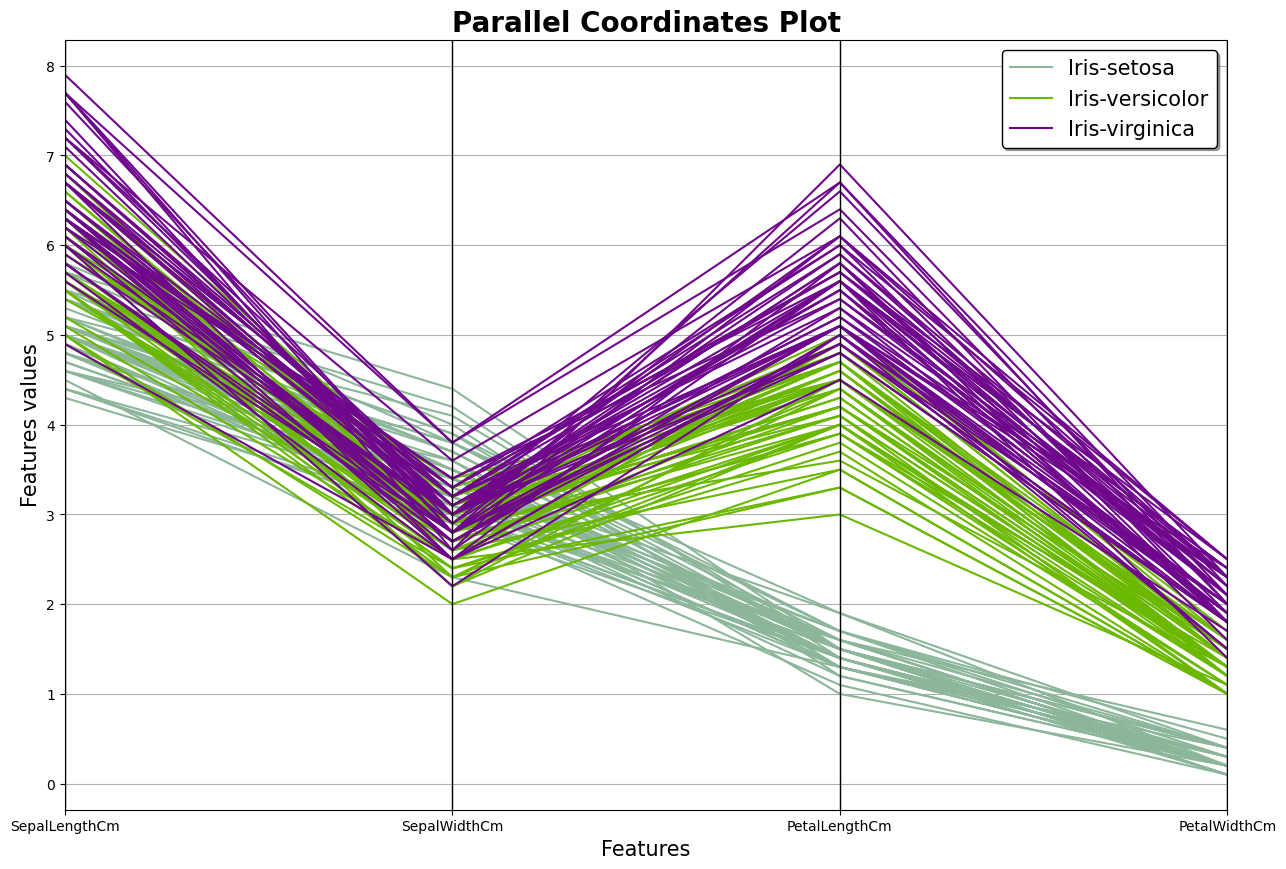

In [10]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

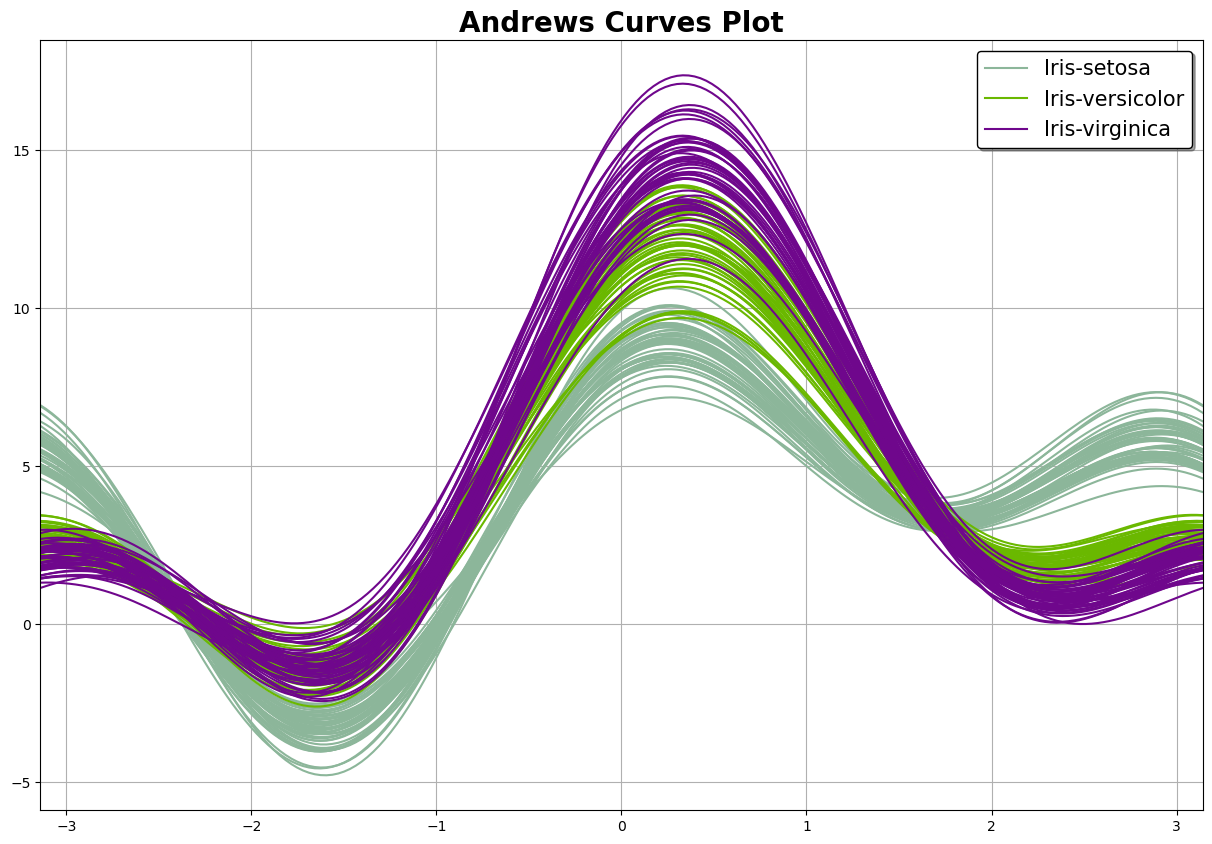

In [11]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 3.2. Pairplot

In multivariate analysis we are concerned with the relations between various data variables. Feature variables may be statistically independent or display statistical dependence. To get an idea, it often helps to look at these dependencies beforehand, but visualisation in high dimensions are tricky, and 2- or at most 3-dimensional visualisations are more intuitive to us. 

Looking at pairwise dependencies is useful when you want to visualize the relationship between multiple variables separately within subsets of your dataset.

__TASK:__ Use the ```pairplot()``` function from seaborn to make pairwise scatterplots, grouped by 'Species', along with the 1-d marginal distributions of features. Again, make sure to drop the Id-column in dataset. 

/Users/aweisse/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

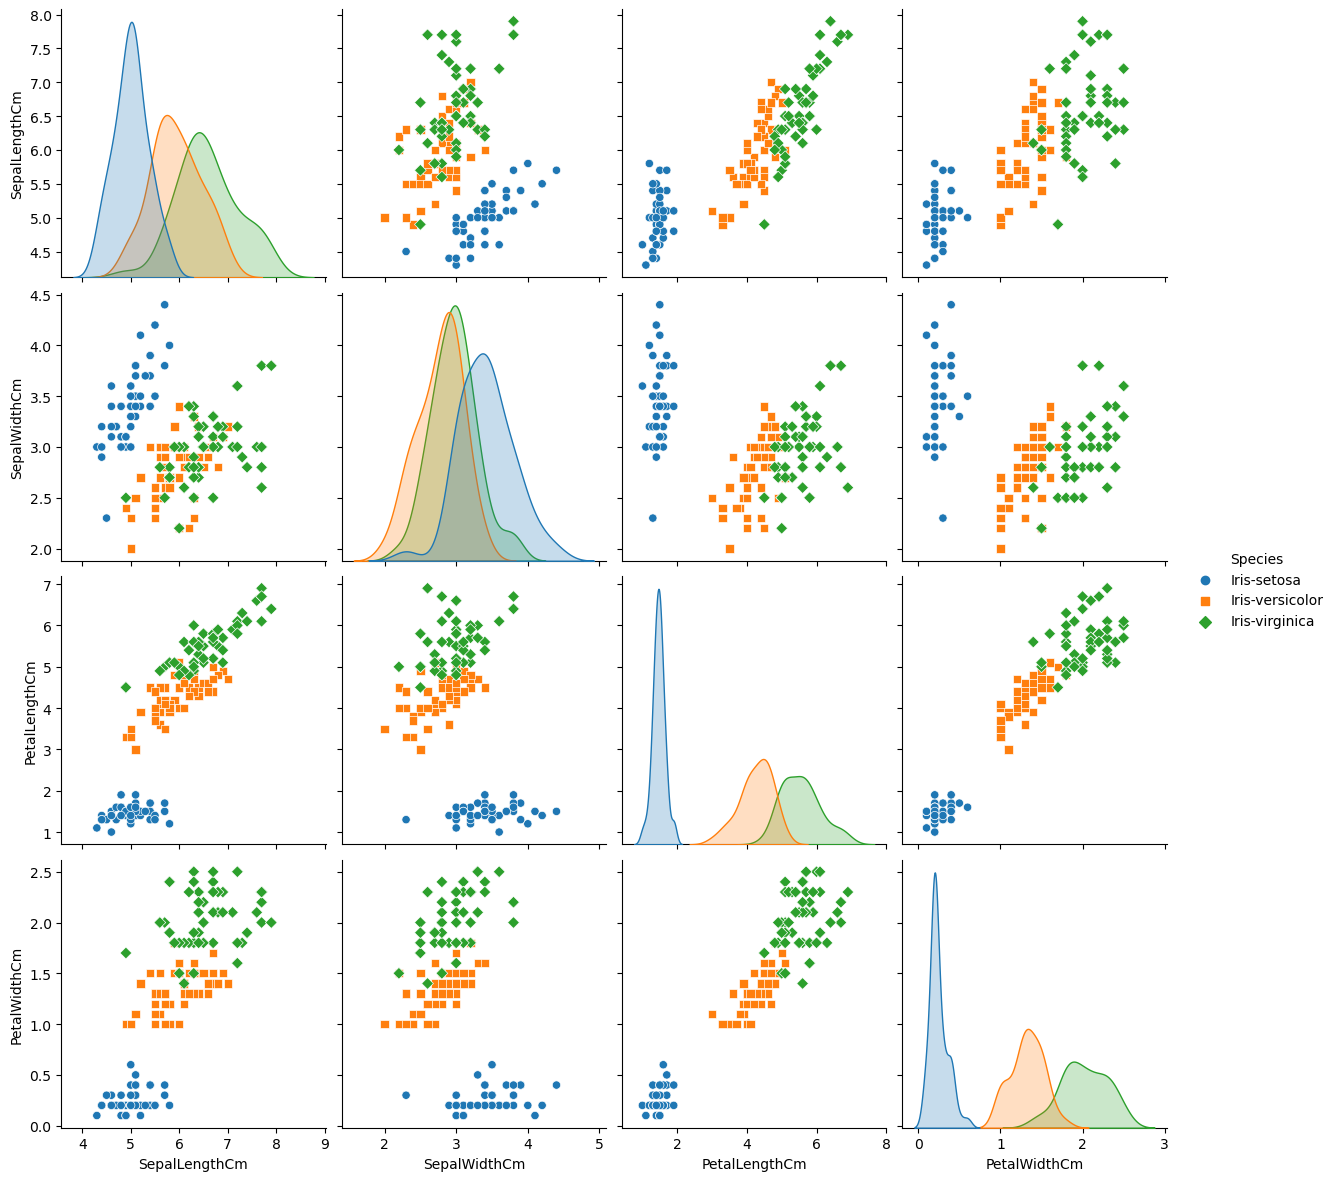

In [12]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()
# P.S. There will be a UserWarning due to a bug in matplotlib - ignore it!

#### 3.3. Boxplots

Boxplots are a simple way to visualise 1-d distributions. 

__TASK:__ Make boxplots of the 4 features grouped by species. Tip: The function ```boxplot()``` is applied directly to your dataset object (with the Id column dropped).

<Figure size 640x480 with 0 Axes>

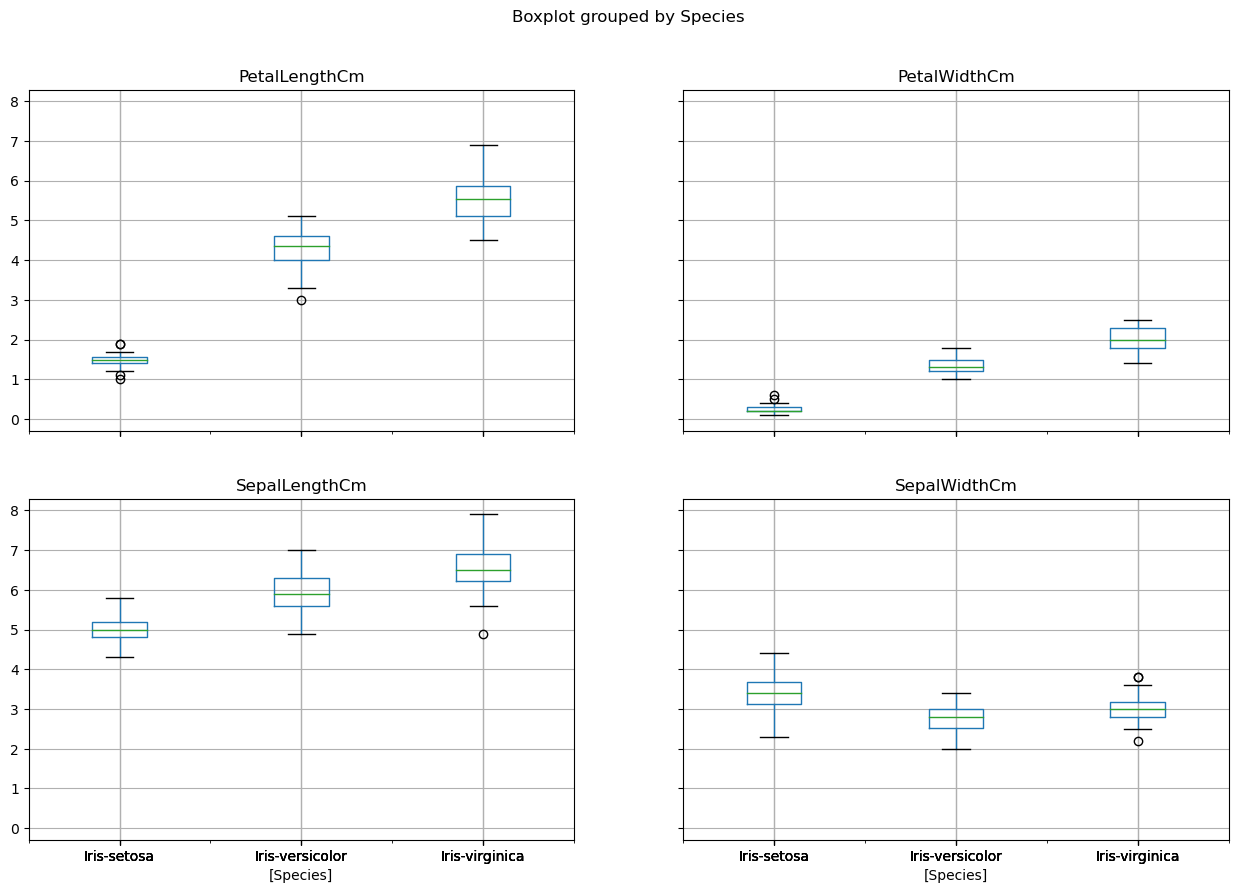

In [13]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

#### 3.4. Alternatives to Boxplots

Box plots are not everyone's favourite, in fact, some journals have banned them. We can use __strip plots__ or __violine plots__ as an alternative. Why do you think people would prefer those over box plots?
Which of the three do you prefer and why?

#### 3.4.1. Strip plots

__TASK:__ Make a figure with four subplots, for each feature, and use the ```stripplot``` function from seaborn, grouping by species. Using the ```size``` property you can control the size of dots in the plots, which can be helpful to better see the data points. 

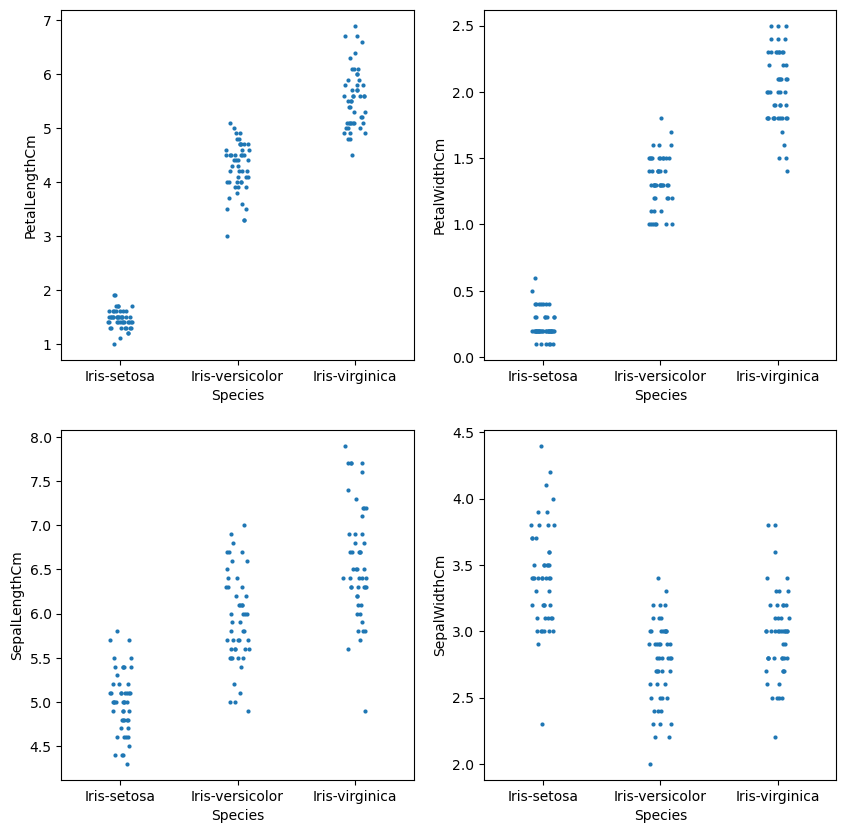

In [14]:
# strip plots of the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.stripplot(x='Species',y='PetalLengthCm',data=dataset, size=3)
plt.subplot(2,2,2)
sns.stripplot(x='Species',y='PetalWidthCm',data=dataset, size=3)
plt.subplot(2,2,3)
sns.stripplot(x='Species',y='SepalLengthCm',data=dataset, size=3)
plt.subplot(2,2,4)
sns.stripplot(x='Species',y='SepalWidthCm',data=dataset, size=3)
plt.show()

#### 3.4.1. Violin plots

__TASK:__ Make a figure with four subplots, for each feature, and use the ```violinplot``` function from seaborn, grouping by species. 

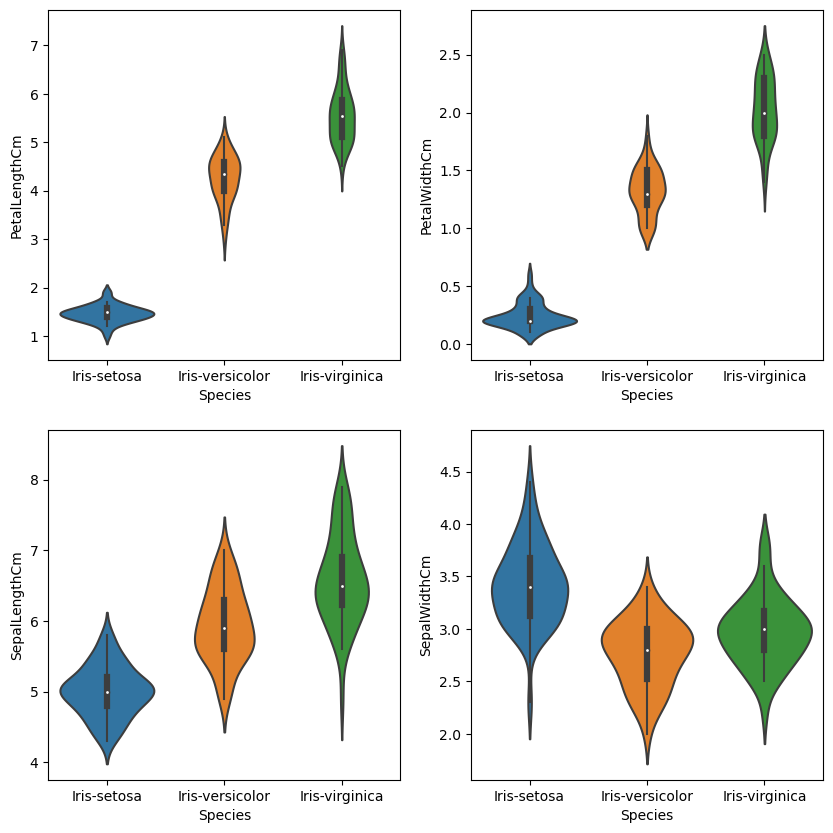

In [15]:
# violin plots
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataset)
plt.show()

#### 3.5. Other options for visualisation of high-dimensional data

Sometimes it is also useful to look at more than 2 variables together. We can use 3D plots to look at 3 variables together at a time, using color, shape, size and other properties of 3D and 2D objects. 

__Optional task:__ Have a go and use ```scatter()``` to make a 3D scatter plot using marker sizes to visualize the fourth dimenssion which is Petal Width [cm].

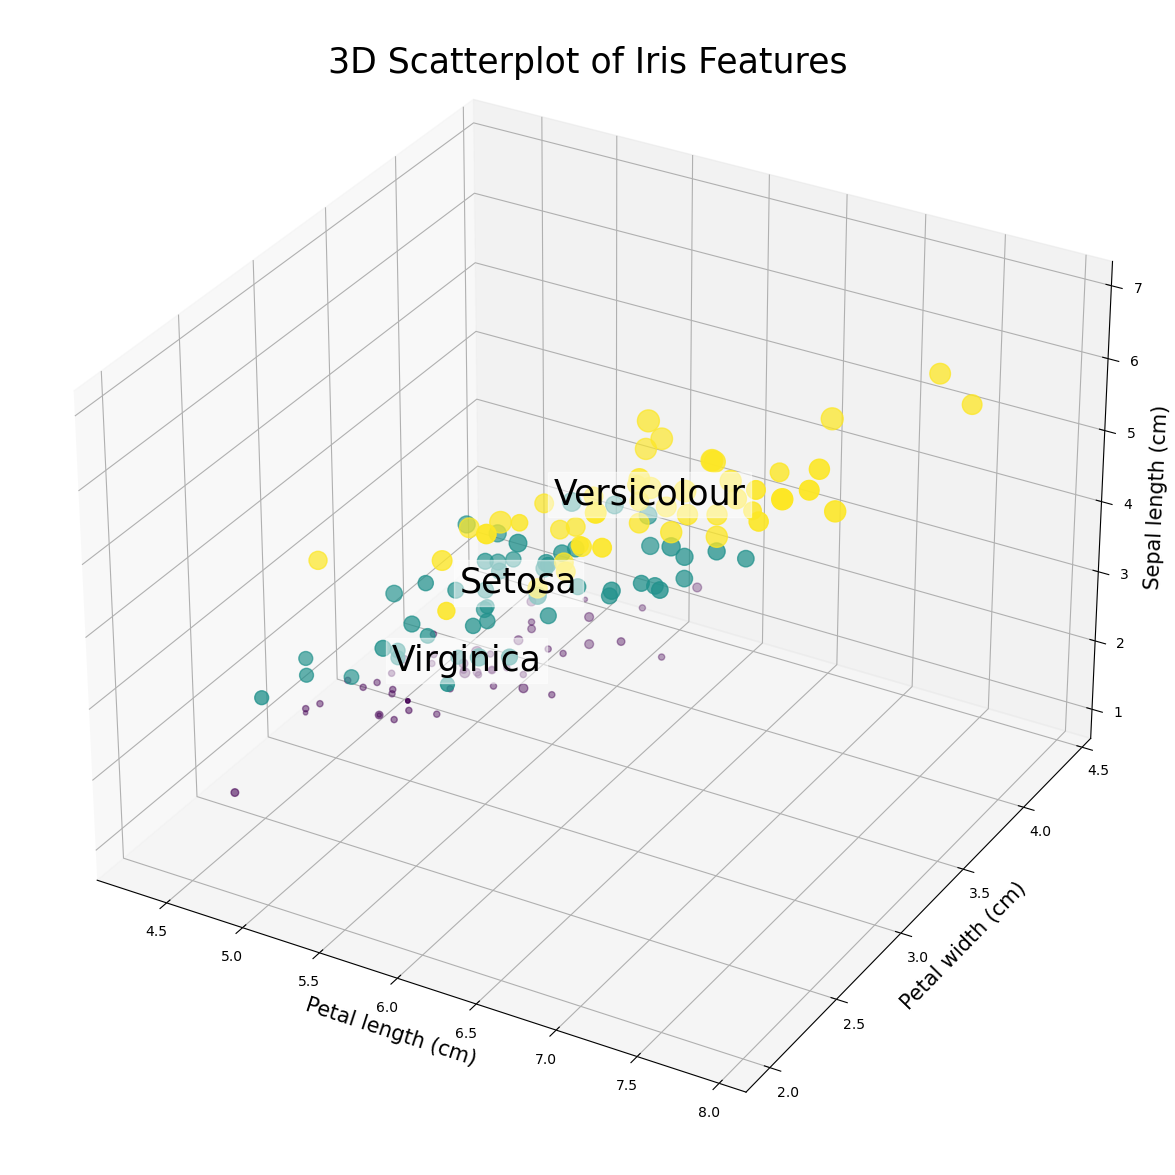

In [16]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# create scatterplot, plotting X[:,i], for i = 0,1,2 and using the 4th feature X[:,3] as marker size
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = X[:,3]*100, c = y) # adding c = y changes the colour of the 3 groups


# adding class labels to the mean points in each class
for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

# add title and axes labels
ax.set_title('3D Scatterplot of Iris Features', fontsize = 25, y = 1.02)
ax.set_xlabel('Petal length (cm)', fontsize = 15)
ax.set_ylabel('Petal width (cm)', fontsize = 15)
ax.set_zlabel('Sepal length (cm)', fontsize = 15)

plt.show()

In [17]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(20, 15))
# ax = Axes3D(fig)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

# for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean(),
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

# ax.set_title("3D visualization", fontsize=40)
# ax.set_xlabel("Sepal Length [cm]", fontsize=25)
# ax.xaxis.set_ticklabels([])
# ax.set_ylabel("Sepal Width [cm]", fontsize=25)
# ax.yaxis.set_ticklabels([])
# ax.set_zlabel("Petal Length [cm]", fontsize=25)
# ax.zaxis.set_ticklabels([])

# plt.show()

### 4. Using KNN for classification

Now that we have familiarised ourselves with the data, let's use the KNN algorithm to predict species lables from the sepal and petal features. 

#### 4.1. Making predictions

__TASK:__ Use ```KNeighborsClassifier()``` from ```sklearn.neighbors``` to first construct a KNN classifier object and then use ```fit()``` on the object to build the classifier from the training set ```X_train```. Finally use ```predict()``` on the classifier object to make predictions for the test dataset ```X_test```.

In [18]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### 4.2. Evaluating predictions

Building confusion matrix using the function ```confusion_matrix()```:

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy using ```accuracy_score()```:

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('\n Accuracy of our model is ' + str(round(accuracy*100, 2)) + '%.')


 Accuracy of our model is 96.67%.


__TASK:__ Reflect on the above result! Are you happy with this accuracy? Is accuracy indeed the best metric to use here, and if so, why? Repeat __§4.1__ & __§4.3__ with a different $k$ - when do you get better or worse predictions? Do you think the estimated accuracy is reliable?

#### 4.3. Using cross-validation for parameter tuning:

Cross-validation is a technique to systematically split up the training and test sets in different ways so as to obtain more robust performance estimates. We will learn more about cross-validation in the next lecture. For now, let's try to use it to determine the best value of $k$. 

__TASK:__ For a list of values $k\in[1, ..., 50]$ build a KNN classifier using again ```KNeighborsClassifier``` and then use the function ```cross_val_score()``` on ```X_train``` and ```y_train``` to obtain robust estimates of the accuracy of the classifiers with different $k$. Store the results in a list ```cv_scores```.

In [21]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cross validation scores
cv_scores = []

# for each value of k, perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

__TASK:__ Let's plot the misclassification error, $MSE = 1 - $accuracy.

<Figure size 640x480 with 0 Axes>

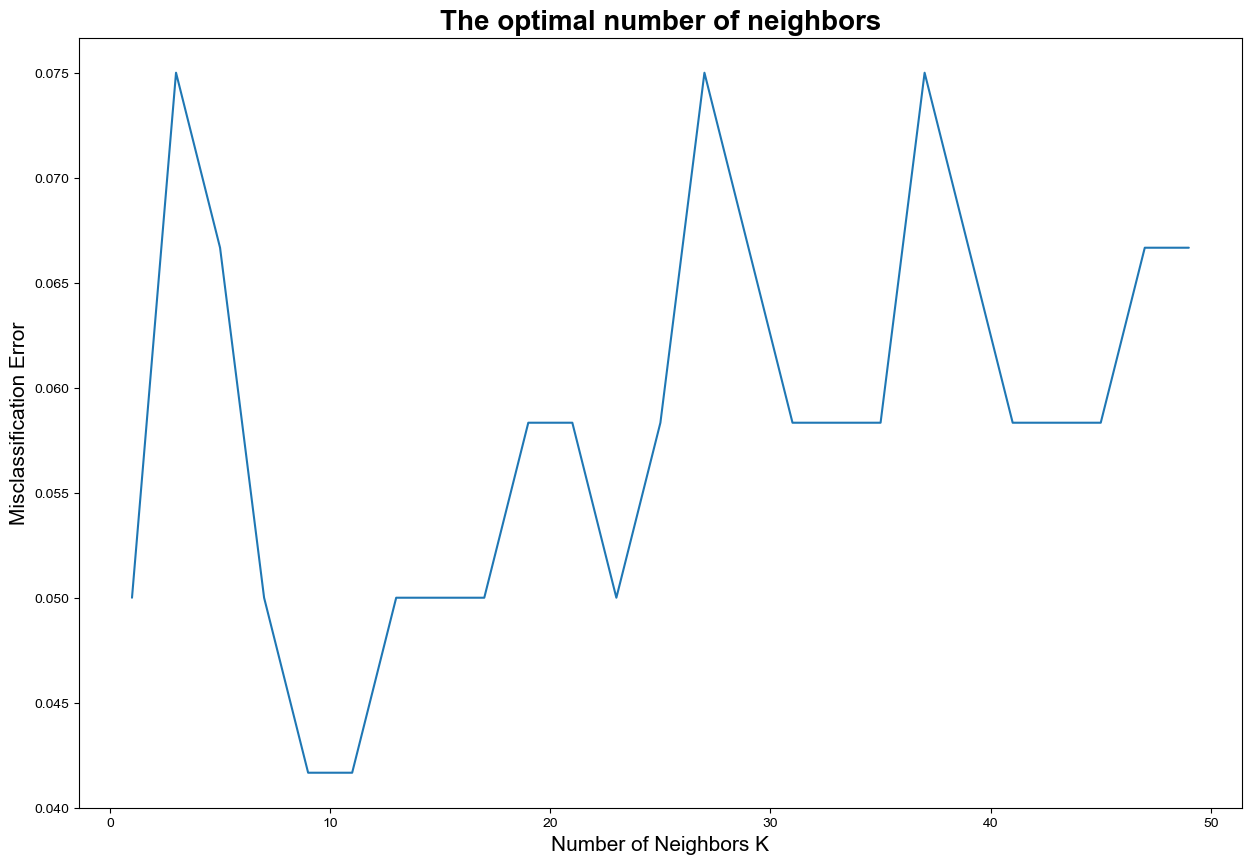

In [22]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

__REFLECT:__ The best $k$-NN classifier is the one that minimises the misclassification error. Find out what the $k$ is. Now look at the trend of the misclassification error - would you have expected that the error goes up again for higher $k$, and if so why? Google the term 'overfitting'. How can you detect overfitting from the above curve?

In [23]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


__TASK:__ Above we have applied 10-fold cross-validation. Repeat the cross-validation analysis at differen fold-values, changing the ```cv``` property in the ```cross_val_score()``` function. What changes do you see? By searching 'cross-validation' what insights can you get on how to choose the fold-value?

### 5. My own KNN implementation

__For the curious-minded:__ The KNN algorithm is relatively simple. Do you think you can implement your own KNN algorithm?

__Optional task:__ Start by building defining ```class MyKNeighborsClassifier()```, it should include functions ```__init__(self, params)```, ```fit(self, X, y)``` and ```predict(self, X_test)```. The ```predict()``` function will loop over all new data points and make single predictions for each point. For that, implement a separate function ```single_prediction(X, y, x_train, k)```, which computes the distance of all training data points to the new point and considers the class label of the $k$ nearest neighbours for a vote on the predicted class label. 

In [24]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [25]:
def single_prediction(X, y, x_test, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_test - X[i]).dot(x_test - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

Now instantiate and fit your KNN model on the training set and make predictions for ```X_test``` for a $k$ of your choice.

In [26]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

__TASK:__ Compute the accuracy of your KNN classifier and compare to the result above using ```KNeighborsClassifier()```.

In [27]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### 6. Bibliography

This notebook has been adapted from https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification. 

Some useful links:

1. MIT Lecture: https://www.youtube.com/watch?v=09mb78oiPkA
2. Iris dataset: https://www.kaggle.com/uciml/iris
3. Theory: http://www.scholarpedia.org/article/K-nearest_neighbor

4. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
5. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
6. https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/